In [223]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import silhouette_score, mean_squared_error, r2_score


In [224]:
data = pd.read_csv("/Users/rahulyadav/Desktop/Projects/clustering&fittting/Country_Data.csv")
# Display the first few rows of the dataset to understand its structure
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [225]:
# Step 1: Data Cleaning & Exploration
data.info(),data.isnull().sum()  # Check for missing values and data types


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


(None,
 country       0
 child_mort    0
 exports       0
 health        0
 imports       0
 income        0
 inflation     0
 life_expec    0
 total_fer     0
 gdpp          0
 dtype: int64)

In [226]:
data = data.dropna()


In [227]:
# Statistical summary
print("\nStatistical Summary:")
print(data.describe())

# Skewness and kurtosis for key columns
from scipy.stats import skew, kurtosis

print("\nSkewness and Kurtosis:")
for col in data.drop(columns=['country']).columns:
    print(f"{col}: Skewness={skew(data[col])}, Kurtosis={kurtosis(data[col])}")



Statistical Summary:
       child_mort     exports      health     imports         income  \
count  167.000000  167.000000  167.000000  167.000000     167.000000   
mean    38.270060   41.108976    6.815689   46.890215   17144.688623   
std     40.328931   27.412010    2.746837   24.209589   19278.067698   
min      2.600000    0.109000    1.810000    0.065900     609.000000   
25%      8.250000   23.800000    4.920000   30.200000    3355.000000   
50%     19.300000   35.000000    6.320000   43.300000    9960.000000   
75%     62.100000   51.350000    8.600000   58.750000   22800.000000   
max    208.000000  200.000000   17.900000  174.000000  125000.000000   

        inflation  life_expec   total_fer           gdpp  
count  167.000000  167.000000  167.000000     167.000000  
mean     7.781832   70.555689    2.947964   12964.155689  
std     10.570704    8.893172    1.513848   18328.704809  
min     -4.210000   32.100000    1.150000     231.000000  
25%      1.810000   65.300000    1

In [228]:
print(data.describe())  # Statistical summary of the data

       child_mort     exports      health     imports         income  \
count  167.000000  167.000000  167.000000  167.000000     167.000000   
mean    38.270060   41.108976    6.815689   46.890215   17144.688623   
std     40.328931   27.412010    2.746837   24.209589   19278.067698   
min      2.600000    0.109000    1.810000    0.065900     609.000000   
25%      8.250000   23.800000    4.920000   30.200000    3355.000000   
50%     19.300000   35.000000    6.320000   43.300000    9960.000000   
75%     62.100000   51.350000    8.600000   58.750000   22800.000000   
max    208.000000  200.000000   17.900000  174.000000  125000.000000   

        inflation  life_expec   total_fer           gdpp  
count  167.000000  167.000000  167.000000     167.000000  
mean     7.781832   70.555689    2.947964   12964.155689  
std     10.570704    8.893172    1.513848   18328.704809  
min     -4.210000   32.100000    1.150000     231.000000  
25%      1.810000   65.300000    1.795000    1330.000000

In [229]:
# Step 2: Preprocessing
# Normalizing numerical features for clustering
features = data.drop(['country'], axis=1)  # Exclude 'country' column
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)


In [230]:
# Define the histogram plotting function
def plot_histogram(data):
    """Plot a histogram showing the distribution of GDP Per Capita."""
    plt.figure(figsize=(8, 5))
    sns.histplot(data['gdpp'], kde=True, bins=30, color='blue')
    plt.title('GDP Per Capita Distribution')
    plt.xlabel('GDP Per Capita')
    plt.ylabel('Frequency')
    plt.grid()
    plt.show()

Generating GDP Histogram...


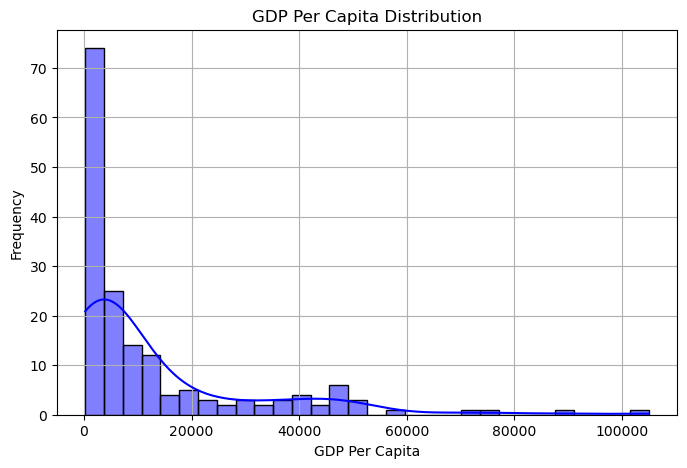

In [231]:
 print("Generating GDP Histogram...")
 plot_histogram(data)

In [232]:
# Pie Chart for Original Data
def plot_income_distribution(data):
    """
    Plots a pie chart for the distribution of countries by income category.

    Parameters:
    - data: DataFrame, the dataset containing the 'income' column.
    """
    # Categorize the countries based on income levels
    bins = [0, 1000, 5000, 20000, float('inf')]  # Adjust ranges based on your dataset
    labels = ['Low Income', 'Lower-Middle Income', 'Upper-Middle Income', 'High Income']
    data['Income Category'] = pd.cut(data['income'], bins=bins, labels=labels)

    # Calculate the distribution of countries in each income category
    income_distribution = data['Income Category'].value_counts()

    # Plot the pie chart
    plt.figure(figsize=(10, 8))
    plt.pie(income_distribution, labels=income_distribution.index, autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff','#99ff99','#ffcc99'])
    plt.title('Country Distribution by Income Level')
    plt.show()


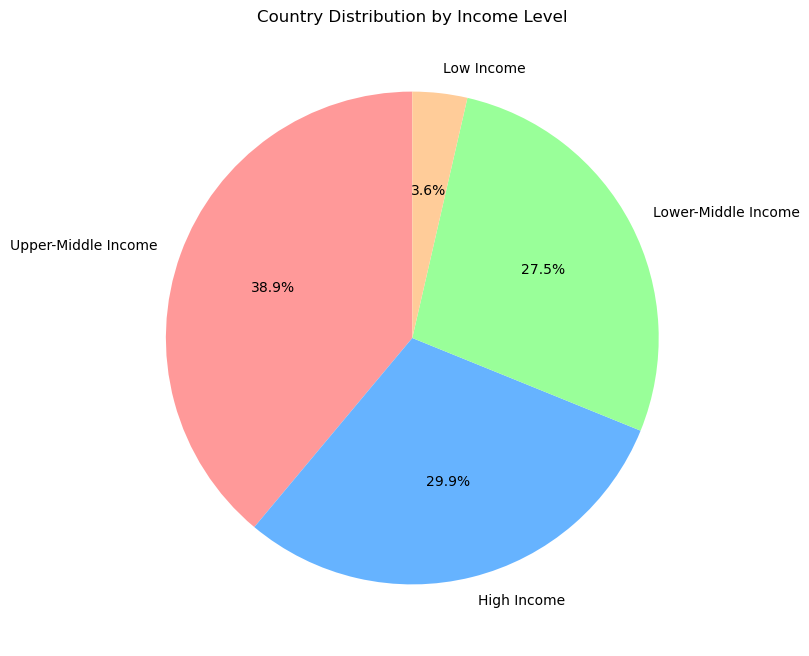

In [233]:
# Call the function to generate the pie chart
plot_income_distribution(data)


In [234]:
# Elbow plot for determining optimal clusters
def plot_elbow(scaled_features):
    """Plot the Elbow Method to find the optimal number of clusters."""
    inertia = []
    for k in range(1, 11):
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(scaled_features)
        inertia.append(kmeans.inertia_)
    plt.figure(figsize=(8, 5))
    plt.plot(range(1, 11), inertia, marker='o')
    plt.title('Elbow Method')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Inertia')
    plt.grid()
    plt.show()


Generating Elbow Plot...


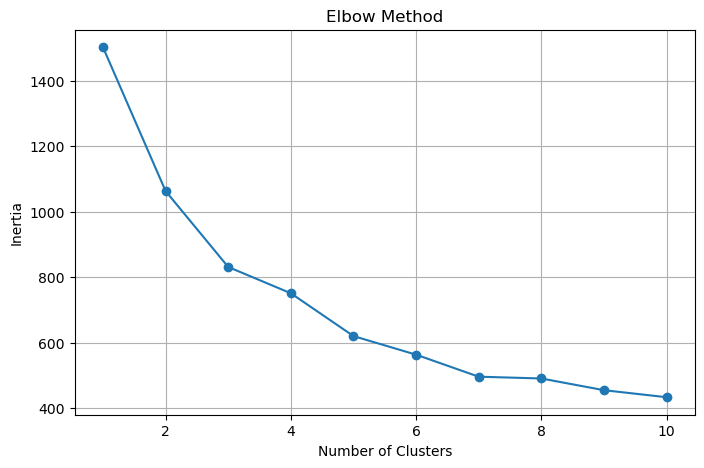

In [235]:
 # Generate plots
 print("Generating Elbow Plot...")
 plot_elbow(scaled_features)

In [236]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

def perform_kmeans(scaled_features, n_clusters=3, random_state=42):
    """
    Perform K-Means clustering on scaled features.

    Parameters:
    - scaled_features: array-like, preprocessed features for clustering.
    - n_clusters: int, number of clusters to form.
    - random_state: int, random state for reproducibility.

    Returns:
    - kmeans: Trained KMeans object.
    - labels: Cluster labels assigned to each data point.
    """
    kmeans = KMeans(n_clusters=n_clusters, random_state=random_state)
    labels = kmeans.fit_predict(scaled_features)
    return kmeans, labels

def plot_clusters_with_centroids(data, feature_x, feature_y, cluster_labels, centroids, title='Clusters Visualization with Centroids'):
    """
    Visualize clusters and centroids based on two features.

    Parameters:
    - data: DataFrame, the original dataset.
    - feature_x: str, column name for x-axis feature.
    - feature_y: str, column name for y-axis feature.
    - cluster_labels: array-like, cluster labels for the data points.
    - centroids: array-like, coordinates of the cluster centroids.
    - title: str, title for the plot.
    """
    # Add cluster labels to the dataset
    data['Cluster'] = cluster_labels

    # Plot data points with cluster labels
    plt.figure(figsize=(20, 12))
    sns.scatterplot(data=data, x=feature_x, y=feature_y, hue='Cluster', palette='viridis', s=50)

    # Plot centroids
    plt.scatter(centroids[:, 0], centroids[:, 1], color='red', marker='X', s=200, label='Centroids')

    # Annotate centroids with their cluster number
    for i, centroid in enumerate(centroids):
        plt.text(centroid[0], centroid[1], f'Cluster {i+1}', color='black', fontsize=12, ha='center', va='center')

   # Customize plot
    plt.title(title, fontsize=20)  # Increase title font size
    plt.xlabel('GDP', fontsize=16)  # Increase X-axis label font size
    plt.ylabel('Health', fontsize=16)  # Increase Y-axis label font size
    plt.legend(title='Cluster', fontsize=15)
    plt.grid()
    plt.show()


# Example Usage
# Assuming `scaled_features` is a preprocessed dataset and `data` is the original DataFrame
n_clusters = 3
kmeans_model, cluster_labels = perform_kmeans(scaled_features, n_clusters)

# Extract centroids
centroids = kmeans_model.cluster_centers_


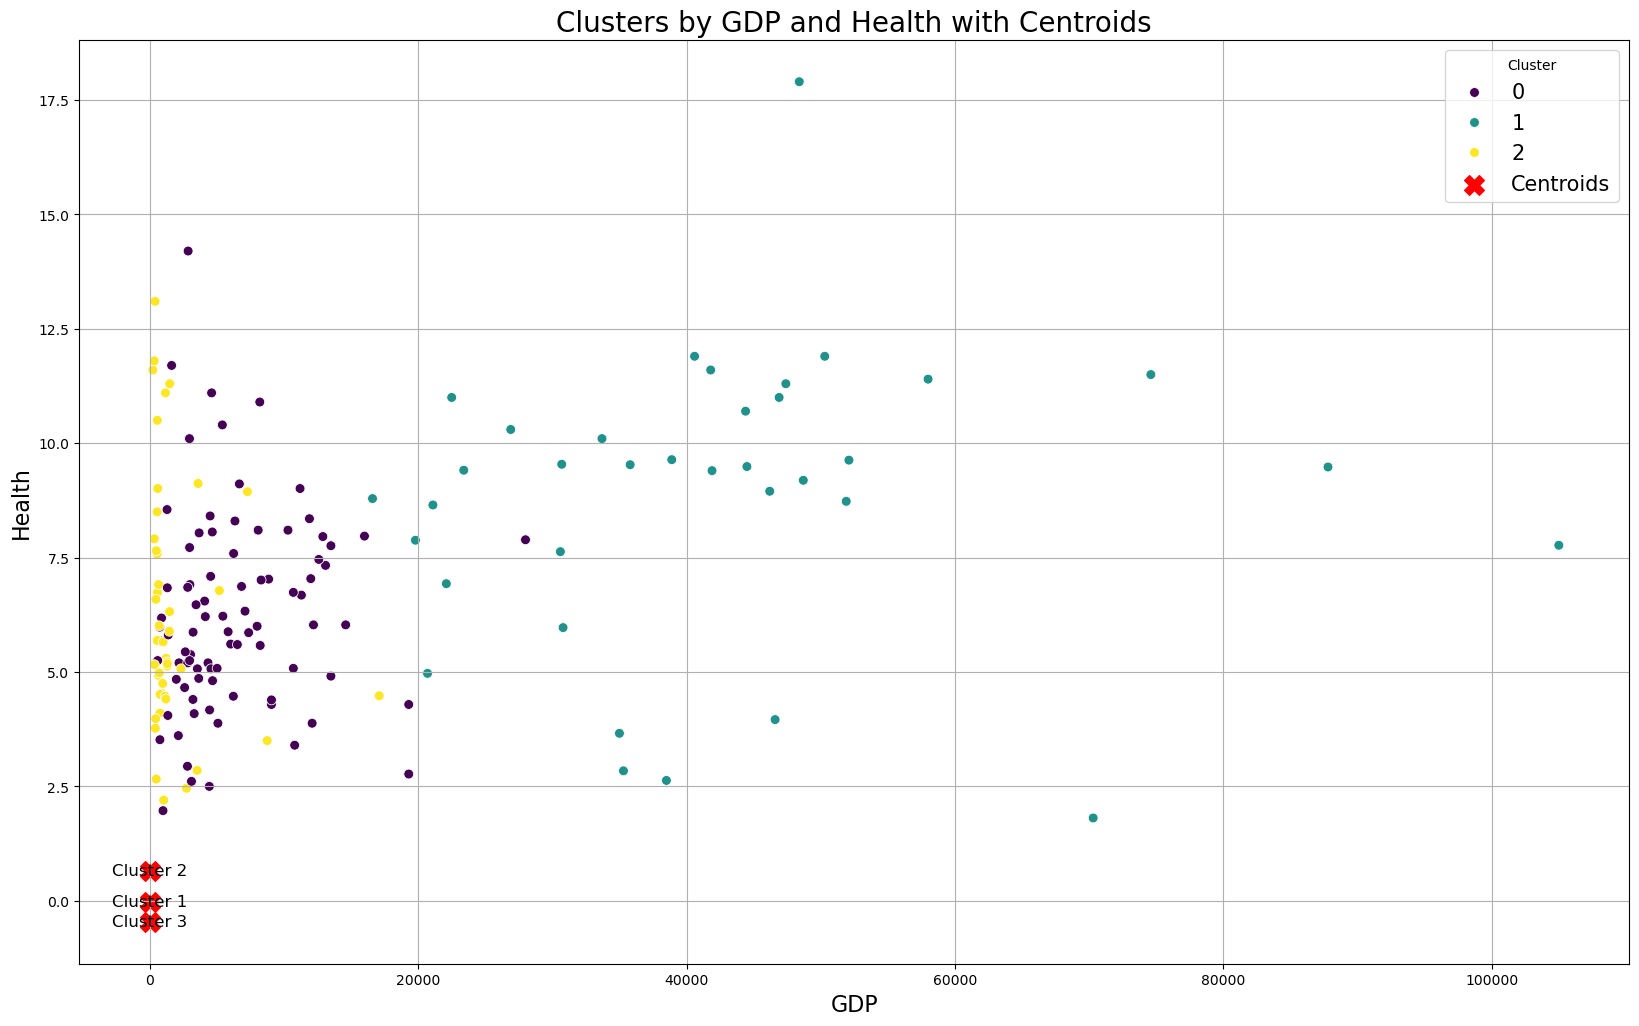

In [237]:
# Plot clusters with centroids
plot_clusters_with_centroids(data, 'gdpp', 'health', cluster_labels, centroids, title='Clusters by GDP and Health with Centroids')


In [238]:
# Step 4: Linear Regression (Fitting)
def plot_regression(data):
    """Plot a regression line for GDP Per Capita and Income."""
    X = data['gdpp'].values.reshape(-1, 1)
    y = data['income']

    # Fit the linear regression model
    reg = LinearRegression()
    reg.fit(X, y)
    y_pred = reg.predict(X)

    # Metrics
    r2 = r2_score(y, y_pred)
    mse = mean_squared_error(y, y_pred)

    # Plot regression
    plt.figure(figsize=(10, 8))
    plt.scatter(X, y, label='Data Points')
    plt.plot(X, y_pred, color='red', label='Regression Line')
    plt.title(f'GDP Per Capita vs Income (R²={r2:.2f}, MSE={mse:.2f})')
    plt.xlabel('GDP Per Capita')
    plt.ylabel('Income')
    plt.legend()
    plt.grid()
    plt.show()



Generating Regression Plot...


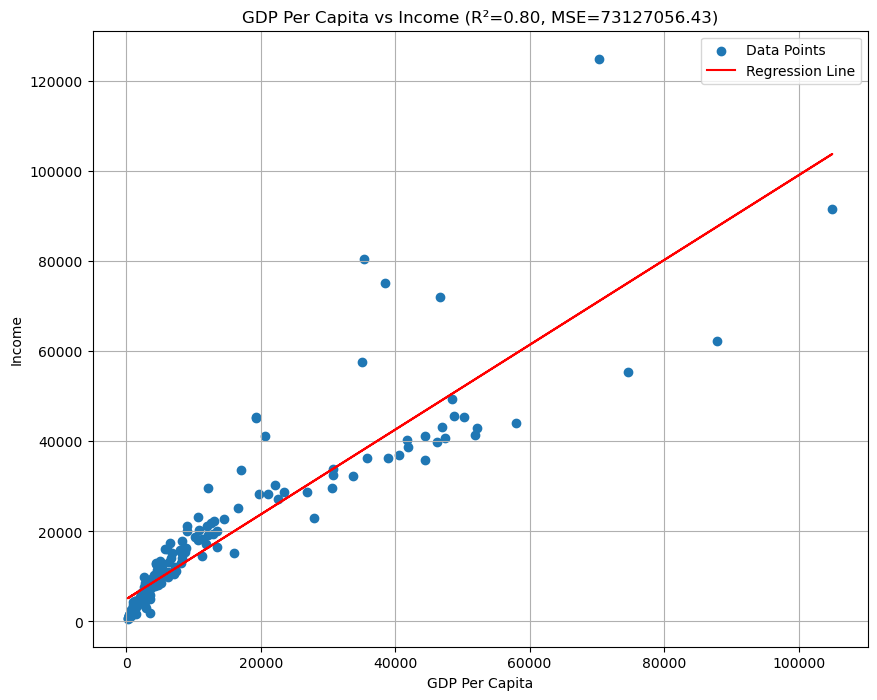

In [239]:
print("Generating Regression Plot...")
plot_regression(data)

In [240]:
# Correlation matrix heatmap
def plot_heatmap(features):
    """Plot a heatmap showing the correlation matrix of the features."""
    plt.figure(figsize=(10, 8))
    corr_matrix = features.corr()
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
    plt.title('Correlation Matrix')
    plt.show()

Generating Heatmap...


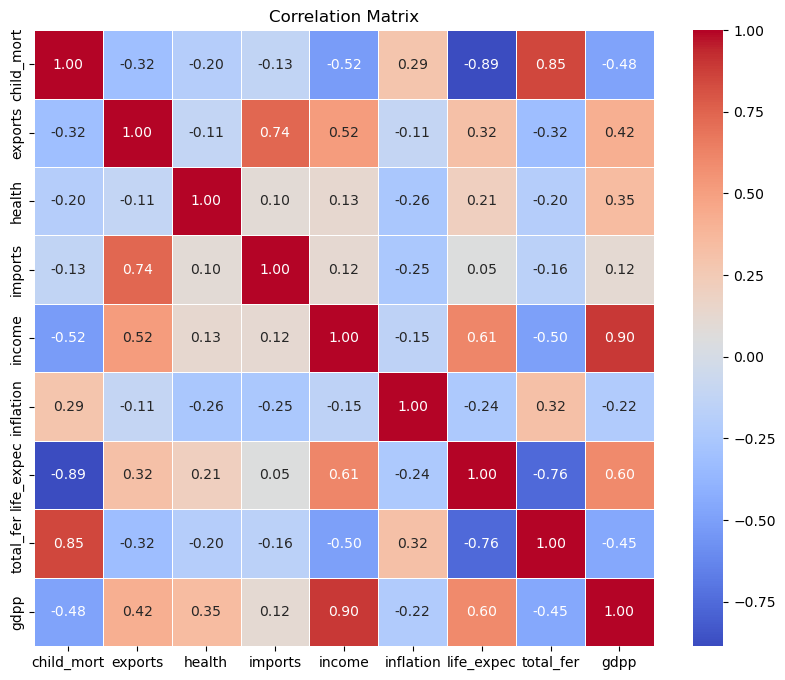

In [241]:
 print("Generating Heatmap...")
plot_heatmap(features)